<a href="https://colab.research.google.com/github/Umeshtheru/ML_API_Heroku/blob/main/CIFAR_10_OBject_Recognisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install kaggle

In [7]:
# Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
#dataset api
!kaggle competitions download -c cifar-10

 99% 705M/715M [00:09<00:00, 51.7MB/s]
100% 715M/715M [00:09<00:00, 76.8MB/s]


In [9]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [10]:
#extracting the compessed dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [11]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [12]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 35.4 MB/s eta 0:00:00


In [13]:
import py7zr

archive =py7zr.SevenZipFile('/content/train.7z', mode ='r')
archive.extractall()
archive.close()

In [14]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Import the Dependencies

In [15]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [16]:
filenames=os.listdir('/content/train')

In [17]:
#Labels Processing
lable_df= pd.read_csv('/content/trainLabels.csv')


In [18]:
lable_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [23]:
lable_df['label']=lable_df['label'].replace({'airplane':0,'automobile':1,'frog':2,'truck':3,'deer':4,'bird':5,'horse':6,'ship':7,'cat':8,'dog':9})
labels=lable_df['label']

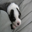

In [20]:
#displayinh sample image
import cv2
from google.colab.patches import cv2_imshow

img=cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [21]:
#Image Processing
#convert images to numpy arrays
id_list = list(lable_df['id'])
train_data_folder = '/content/train/'
data=[]
for id in id_list:
  image = Image.open(train_data_folder + str(id)+'.png')
  image = np.array(image)
  data.append(image)

In [25]:
X=np.array(data)
Y=np.array(labels)
X.shape

(50000, 32, 32, 3)

In [26]:
#Train_Test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [27]:
#scaling
X_train_scaled = X_train/255
X_test_scalled = X_test/255

Building the Neural Network

In [29]:
import tensorflow as tf
from tensorflow import keras

In [32]:
number_of_class = 10

model = keras.Sequential([
     keras.layers.Flatten(input_shape=(32,32,3)),
     keras.layers.Dense(64,activation = 'relu'),
     keras.layers.Dense(number_of_class, activation='softmax')
])

In [36]:
model.compile(optimizer = 'adam',
               loss='sparse_categorical_crossentropy',
               metrics= ['accuracy'])

In [37]:
#trainig the neural network
model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 [==============================] - 6s 4ms/step - loss: 1.9417 - accuracy: 0.2971 - val_loss: 1.8471 - val_accuracy: 0.3285
Epoch 2/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.8220 - accuracy: 0.3445 - val_loss: 1.7904 - val_accuracy: 0.3495
Epoch 3/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.7747 - accuracy: 0.3628 - val_loss: 1.7286 - val_accuracy: 0.3720
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7593 - accuracy: 0.3707 - val_loss: 1.7114 - val_accuracy: 0.3767
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7329 - accuracy: 0.3799 - val_loss: 1.7227 - val_accuracy: 0.3772
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7221 - accuracy: 0.3853 - val_loss: 1.7729 - val_accuracy: 0.3638
Epoch 7/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7081 - accuracy: 0.3898 - val_loss: 1.6972 - val_accuracy: